In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
df=pd.read_csv("student_score.csv")
print(df.head())


   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [13]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [10]:
df.isnull().sum()  #gives total number of null values

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [14]:
df.drop("Unnamed: 0", axis=1)
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

# Values of top 5 

In [15]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# GENDER DISTRIBUTION 

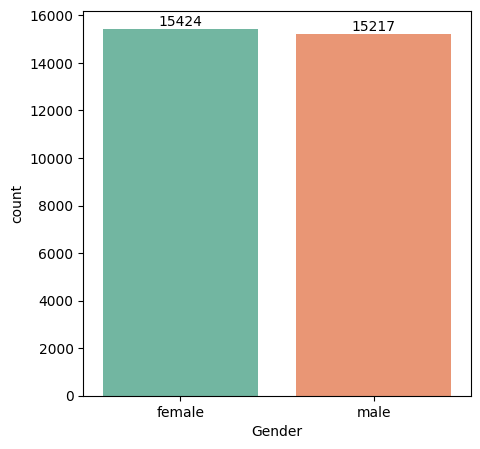

In [31]:
plt.figure(figsize=(5,5))
xy=sns.countplot(data=df,x="Gender",hue="Gender",palette="Set2")
for container in xy.containers:
    xy.bar_label(container)
plt.show()

From the data we can analyse that the number of females in the data is more than the number of males

# MARKS DISTRIBUTION BASED ON PARENTS EDUCATION

In [36]:
gb=df.groupby("ParentEduc").aggregate({"MathScore":'mean',"ReadingScore":'mean', "WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


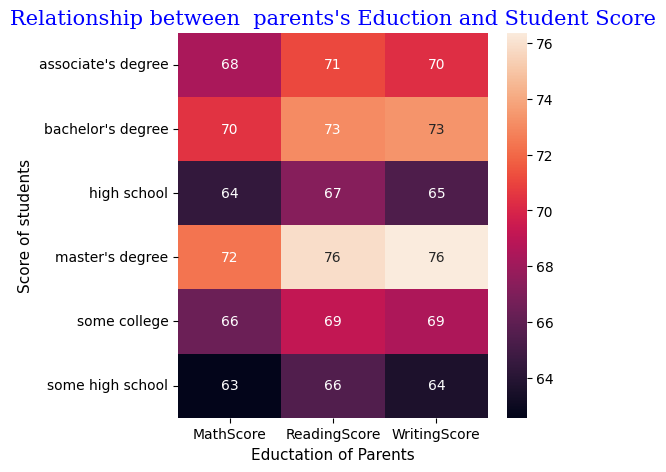

In [123]:
plt.figure(figsize=(5,5))
sns.heatmap(gb, annot=True)
font1={'family' : 'serif', 'size': '15', 'color':'blue'}
plt.title("Relationship between  parents's Eduction and Student Score", fontdict=font1)
plt.xlabel("Eductation of Parents", size=11)
plt.ylabel("Score of students", size=11)
plt.show()

 we can conclude that parent's education has a good impact on student's score

# MARKS BASED ON PARENT'S MARITAL STATUS 

In [43]:
gp=df.groupby("ParentMaritalStatus").aggregate({"MathScore":'mean',"ReadingScore":'mean', "WritingScore":'mean'})
print(gp)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


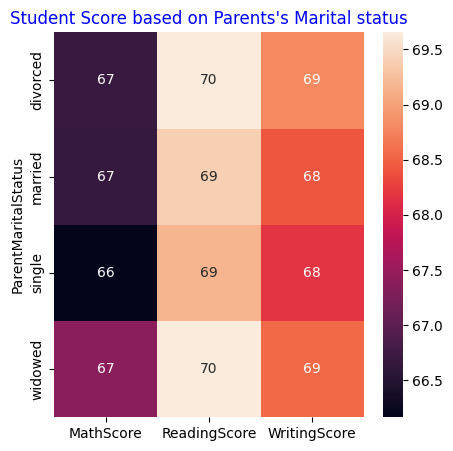

In [122]:
plt.figure(figsize=(5,5))
plt.title("Student Score based on Parents's Marital status", color='blue')
sns.heatmap(gp,annot=True)
plt.show()

We can conclude that the parent's marital status does not  necessarily affect the score of students

In [61]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# PERCENTAGE DISTRIBUTION AND COUNT OF ETHNIC GROUPS

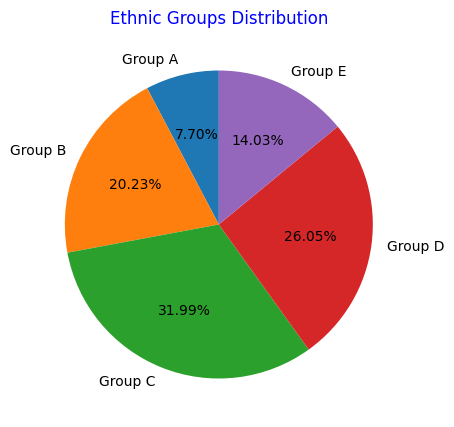

In [94]:
plt.figure(figsize=(5,5))
groupA=df.loc[(df['EthnicGroup']== 'group A')].count()
groupB=df.loc[(df['EthnicGroup']== 'group B')].count()
groupC=df.loc[(df['EthnicGroup']== 'group C')].count()
groupD=df.loc[(df['EthnicGroup']== 'group D')].count()
groupE=df.loc[(df['EthnicGroup']== 'group E')].count()
plt.title("Ethnic Groups Distribution", color="Blue")


x=np.array([groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]])
mylabels=['Group A', 'Group B', 'Group C','Group D', 'Group E']
plt.pie(x, labels=mylabels, startangle=90, autopct="%1.2f%%")
plt.show()

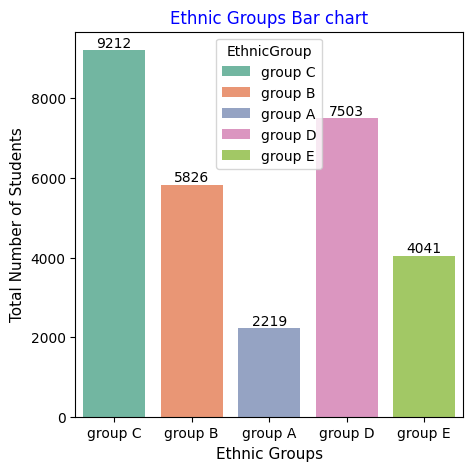

In [109]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df, x='EthnicGroup',hue='EthnicGroup', palette="Set2")

for container in ax.containers:
    ax.bar_label(container)
plt.title("Ethnic Groups Bar chart", color='blue')
plt.xlabel("Ethnic Groups", size=11)
plt.ylabel("Total Number of Students", size=11)
plt.show()

# TOTAL NUMBER OF STUDENT'S PRACTICING SPORTS

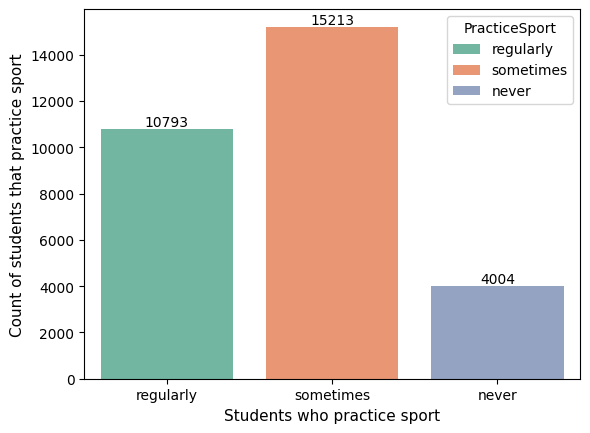

In [111]:
ax=sns.countplot(x='PracticeSport', hue='PracticeSport', data=df, palette='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Students who practice sport", size=11 )
plt.ylabel("Count of students that practice sport", size=11 )
plt.show()

The above chart concludes that many student play sports sometimes and only few of them never play sport

# HOW DOES SPORT AFFECT STUDENT'S MARKS

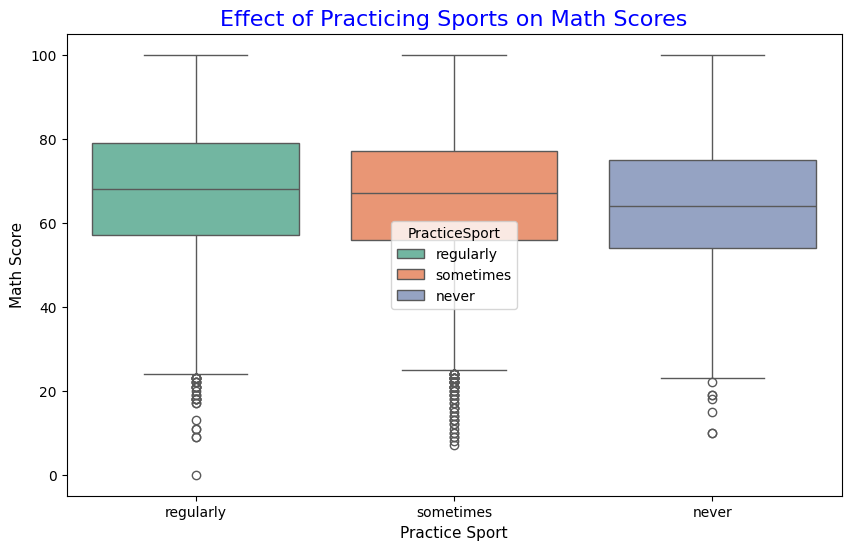

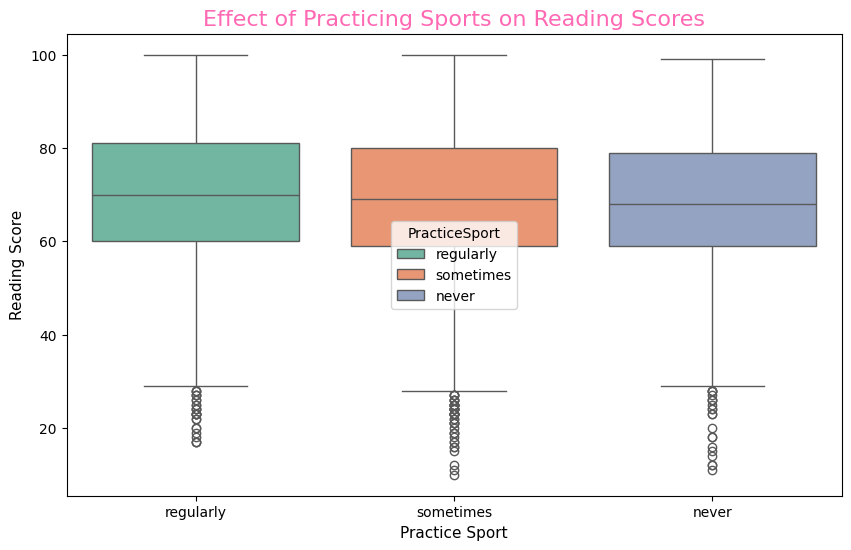

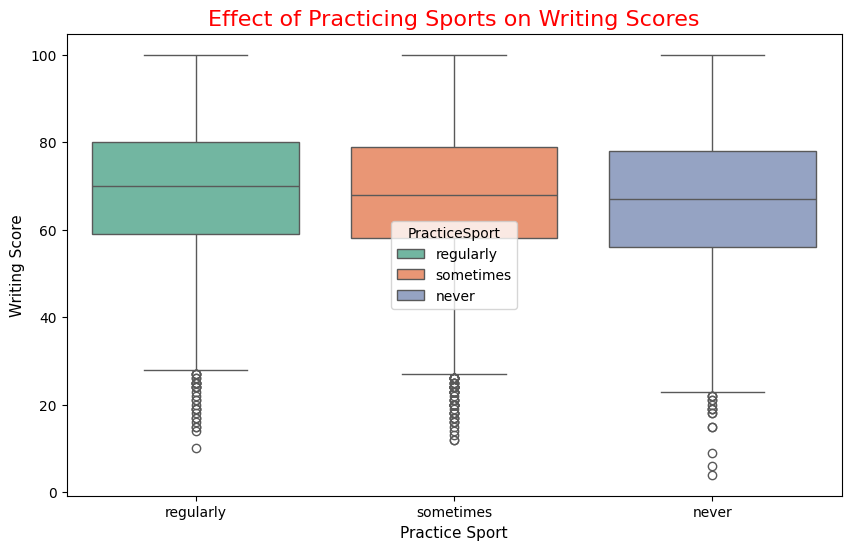

In [120]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PracticeSport', y='MathScore', data=df, hue='PracticeSport', palette='Set2')
plt.title('Effect of Practicing Sports on Math Scores', fontsize=16, color='blue')
plt.xlabel('Practice Sport', fontsize=11)
plt.ylabel('Math Score', fontsize=11)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='PracticeSport', y='ReadingScore', data=df, hue='PracticeSport',palette='Set2')
plt.title('Effect of Practicing Sports on Reading Scores', fontsize=16, color='hotpink')
plt.xlabel('Practice Sport', fontsize=11)
plt.ylabel('Reading Score', fontsize=11)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='PracticeSport', y='WritingScore', data=df,hue='PracticeSport', palette='Set2')
plt.title('Effect of Practicing Sports on Writing Scores', fontsize=16, color='red')
plt.xlabel('Practice Sport', fontsize=11)
plt.ylabel('Writing Score', fontsize=11)
plt.show()


The above chart tells us that practicing sports didn't really affect the score of students 

# MEANS OF TRANSPORT OF THE STUDENTS

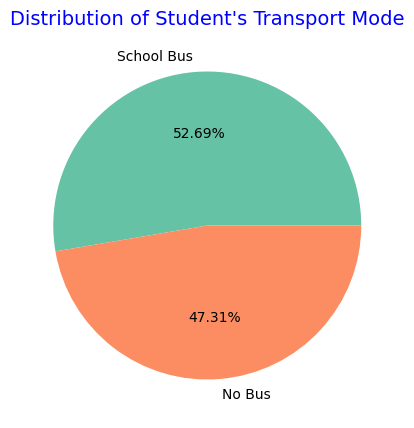

In [130]:
transport_counts = df['TransportMeans'].apply(lambda x: 'school_bus' if x == 'school_bus' else 'NaN').value_counts()

transport_percentages = transport_counts / transport_counts.sum() * 100
mylabel=['School Bus', 'No Bus']

plt.figure(figsize=(5, 5))
plt.pie(transport_percentages, labels=mylabel, autopct='%1.2f%%', colors=sns.color_palette("Set2"))
plt.title("Distribution of Students Transport Mode", fontsize=14, color='blue')
plt.show()

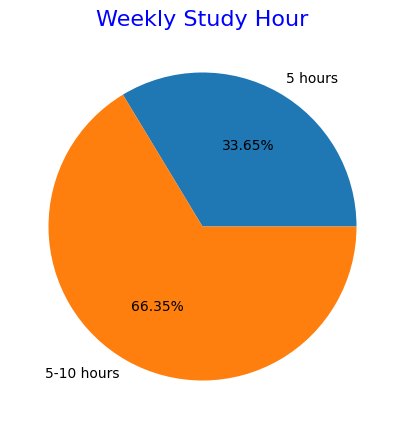

In [148]:
plt.figure(figsize=(5,5))
stuA=df.loc[(df['WklyStudyHours']== '< 5')].count()
stuB=df.loc[(df['WklyStudyHours']== '5 - 10')].count()

plt.title("Weekly Study Hour", color="Blue", size=16)

label=['5 hours', '5-10 hours']
x=np.array([stuA["WklyStudyHours"], stuB["WklyStudyHours"]])

plt.pie(x, labels=label , startangle=0, autopct="%1.2f%%")
plt.show()